# MOOC TestExer6 TimeSeries
This test exercise uses data that are available in the data file TestExer6. The question of interest is to model monthly inflation in the Euro area and to investigate whether inflation in the United States of America has predictive power for inflation in the Euro area. Monthly data on the consumer price index (CPI) for the Euro area and the USA are available from January 2000 until December 2011. The data for January 2000 until December 2010 are used for specification and estimation of models, and the data for 2011 are left out for forecast evaluation purposes.

In [1]:
import pandas as pd
raw_data = pd.read_csv('TestExer6_CPI.txt', sep='\t', index_col=False)
raw_data.head()

,YYYY_MM,TREND,CPI_EUR,CPI_USA,LOGPEUR,LOGPUSA,DPEUR,DPUSA
0,2000M01,1,105.1,107.6,4.654912,4.678421,NaN,NaN
1,2000M02,2,105.4,108.3,4.657763,4.684905,0.002850,0.006485
2,2000M03,3,105.8,109.1,4.661551,4.692265,0.003788,0.007360
3,2000M04,4,105.9,109.2,4.662495,4.693181,0.000945,0.000916
4,2000M05,5,106.0,109.3,4.663439,4.694096,0.000944,0.000915


**(a)** Make time series plots of the $CPI$ of the Euro area and the USA, and also of their logarithm $log(CPI)$ and of the two monthly inflation series $DP = \Delta log(CPI)$. What conclusions do you draw from these plots?

In [2]:
raw_data['YEAR'] = raw_data.YYYY_MM.str[0:4].astype(int)
train = raw_data.YEAR < 2011
test = ~train
# select training data set and test data set

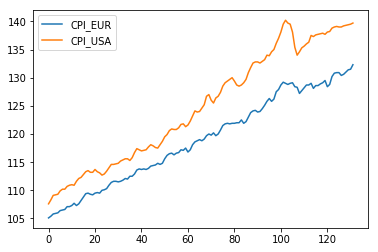

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
raw_data[train].CPI_EUR.plot()
raw_data[train].CPI_USA.plot()
plt.legend()
plt.show()

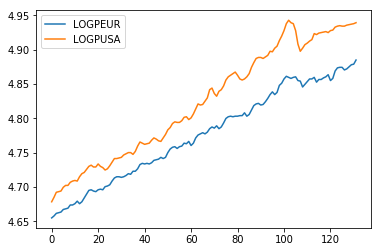

In [4]:
plt.figure()
raw_data[train].LOGPEUR.plot()
raw_data[train].LOGPUSA.plot()
plt.legend()
plt.show()

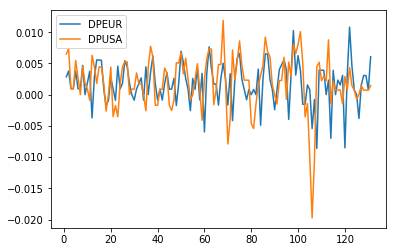

In [5]:
plt.figure()
raw_data[train].DPEUR.plot()
raw_data[train].DPUSA.plot()
plt.legend()
plt.show()

**Conclusion:** DPEUR and DPUSA look stationary. However, the variance becomes bigger at last several data.

**(b)** Perform the Augmented Dickey-Fuller (ADF) test for the two $log(CPI)$ series. In the ADF test equation, include a constant ($\alpha$), a deterministic trend term ($\beta_t$), three lags of $DP = \Delta log(CPI)$ and, of course, the variable of interest $log(CPI_{t-1})$. Report the coefficient of $log(CPI_{t-1})$ and its standard error and t-value, and draw your conclusion.

In [6]:
import statsmodels.formula.api as smf

def summary(model, names):
    return pd.DataFrame({'coef': names, 'value': model.params, 'SE': model.bse, 't-value': model.tvalues, 'p-value': model.pvalues}
                        , columns = ['coef', 'value', 'SE', 't-value', 'p-value'])
ADF_EU = smf.ols('DPEUR~TREND+DPEUR.shift(1)+DPEUR.shift(2)+DPEUR.shift(3)+LOGPEUR.shift(1)', data=raw_data[train]).fit()
summary(ADF_EU, names=[r'$\alpha$', r'${\beta}$', r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\rho$'])

,coef,value,SE,t-value,p-value
Intercept,$\alpha$,0.558907,0.226658,2.465857,0.015058
TREND,${\beta}$,0.000205,0.000086,2.379713,0.018876
DPEUR.shift(1),$\gamma_1$,0.134337,0.091709,1.464819,0.145543
DPEUR.shift(2),$\gamma_2$,-0.041029,0.090755,-0.452087,0.652009
DPEUR.shift(3),$\gamma_3$,-0.127035,0.091257,-1.392061,0.166436
LOGPEUR.shift(1),$\rho$,-0.119527,0.048692,-2.454768,0.015508


The last row above shows that the coefficient of $\log({CPIEUR}_{t-1})$, its standard error and $t$-value.

Critical value of the ADF test with trend included is -3.5, which is less than $t_\rho = -2.45$, so we canntot reject the $H_0$ that $\log(CPIEUR)$ is non-stationary.

In [7]:
ADF_US = smf.ols('DPUSA~TREND+DPUSA.shift(1)+DPUSA.shift(2)+DPUSA.shift(3)+LOGPUSA.shift(1)', data=raw_data[train]).fit()
summary(ADF_US, names=[r'$\alpha$', r'${\beta}$', r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\rho$'])

,coef,value,SE,t-value,p-value
Intercept,$\alpha$,0.333684,0.138134,2.415651,1.718983e-02
TREND,${\beta}$,0.000146,0.000064,2.287690,2.387765e-02
DPUSA.shift(1),$\gamma_1$,0.607725,0.088556,6.862585,3.011342e-10
DPUSA.shift(2),$\gamma_2$,-0.168412,0.100970,-1.667940,9.789244e-02
DPUSA.shift(3),$\gamma_3$,0.007974,0.091115,0.087518,9.304029e-01
LOGPUSA.shift(1),$\rho$,-0.070985,0.029537,-2.403227,1.775693e-02


And then we apply ADF on the USA's data.

The last row above shows that the coefficient of $\log({CPIUSA}_{t-1})$, its standard error and $t$-value.

Critical value of the ADF test with trend included is -3.5, which is less than $t_\rho = -2.40$, so we canntot reject the $H_0$ that $\log(CPIUSA)$ is non-stationary.

**(c)** As the two series of $log(CPI)$ are not cointegrated (you need not check this), we continue by modelling the monthly inflation series $DPEUR = \Delta log(CPIEUR)$ for the Euro area. Determine the sample autocorrelations and the sample partial autocorrelations of this series to motivate the use of the following AR model: $DPEUR_t = \alpha + \beta_1 DPEUR_{t-6} + \beta_2 DPEUR_{t-12} + \epsilon_t$. Estimate the parameters of this model (sample Jan 2000 - Dec 2010).

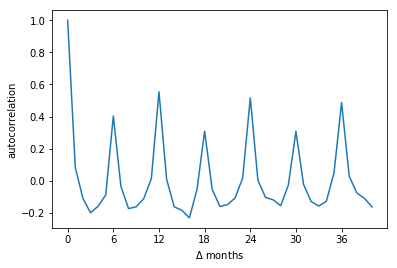

In [8]:
import statsmodels.tsa.stattools as ts
autocorr = ts.acf(raw_data[train].DPEUR.dropna())

plt.figure()
plt.plot(autocorr)
plt.xticks(range(0, 42, 6))
plt.xlabel('$\Delta$ months')
plt.ylabel('autocorrelation')
plt.show()

We see that the autocorrelation is higher for multipliers of 6. So, we use $t-6$ and $t-12$ to calculate patial autocorrelation.

In [9]:
model_pa = smf.ols('DPEUR~DPEUR.shift(6)+DPEUR.shift(12)', data=raw_data[train]).fit()
summary(model_pa, names=[r'$\alpha$', r'$\beta_1$', r'$\beta_2$'])

,coef,value,SE,t-value,p-value
Intercept,$\alpha$,0.000384,0.000281,1.364996,1.748960e-01
DPEUR.shift(6),$\beta_1$,0.188746,0.077289,2.442088,1.611174e-02
DPEUR.shift(12),$\beta_2$,0.597984,0.083554,7.156821,8.045585e-11


**(d)** Extend the AR model of part (c) by adding lagged values of monthly inflation in the USA at lags 1, 6, and 12. Check that the coefficient at lag 6 is not significant, and estimate the ADL model $DPEUR_t = \alpha + \beta_1 DPEUR_{t-6} + \beta_2 DPEUR_{t-12} + \gamma_1 DPUSA_{t-1} + \gamma_2 DPUSA_{t-12} + \varepsilon_t$(sample Jan 2000 - Dec 2010).

In [10]:
model_AR = smf.ols('DPEUR~DPEUR.shift(6)+DPEUR.shift(12)+DPUSA.shift(1)+DPUSA.shift(6)+DPUSA.shift(12)', data=raw_data[train]).fit()
summary(model_AR, names=[r'$\alpha$', r'$\beta_1$', r'$\beta_2$', r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$'])

,coef,value,SE,t-value,p-value
Intercept,$\alpha$,0.000441,0.000285,1.544532,1.252556e-01
DPEUR.shift(6),$\beta_1$,0.202989,0.078552,2.584138,1.103673e-02
DPEUR.shift(12),$\beta_2$,0.636746,0.087477,7.279049,4.784004e-11
DPUSA.shift(1),$\gamma_1$,0.226429,0.051129,4.428607,2.201876e-05
DPUSA.shift(6),$\gamma_2$,-0.056056,0.054764,-1.023591,3.082147e-01
DPUSA.shift(12),$\gamma_3$,-0.230042,0.054169,-4.246706,4.473098e-05


The p-value of $\gamma_2$ suggests that the coefficient for ${DPUSA}_{t-6}$ is not significant.

In [11]:
model_ADL = smf.ols('DPEUR~DPEUR.shift(6)+DPEUR.shift(12)+DPUSA.shift(1)+DPUSA.shift(12)', data=raw_data[train]).fit()
summary(model_ADL, names=[r'$\alpha$', r'$\beta_1$', r'$\beta_2$', r'$\gamma_1$', r'$\gamma_3$'])

,coef,value,SE,t-value,p-value
Intercept,$\alpha$,0.000339,0.000268,1.267306,2.076287e-01
DPEUR.shift(6),$\beta_1$,0.168731,0.071080,2.373814,1.927736e-02
DPEUR.shift(12),$\beta_2$,0.655153,0.085626,7.651306,6.930071e-12
DPUSA.shift(1),$\gamma_1$,0.232646,0.050777,4.581704,1.186531e-05
DPUSA.shift(12),$\gamma_3$,-0.226488,0.054069,-4.188837,5.551631e-05


**(e)** Use the models of parts (c) and (d) to make two series of 12 monthly inflation forecasts for 2011. At each month, you should use the data that are then available, for example, to forecast inflation for September 2011 you can use the data up to and including August 2011. However, do not re-estimate the model and use the coefficients as obtained in parts (c) and (d). For each of the two forecast series, compute the values of the root mean squared error (RMSE), mean absolute error (MAE), and the sum of the forecast errors (SUM). Finally, give your interpretation of the outcomes.

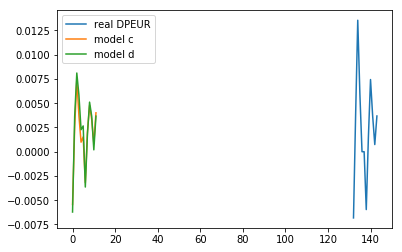

In [20]:
import numpy as np
import statsmodels.api as sm

X = sm.add_constant(np.column_stack([raw_data.DPEUR.shift(6), raw_data.DPEUR.shift(12)]))
c_ = model_pa.predict(X[test], transform=False)
X = sm.add_constant(np.column_stack([raw_data.DPEUR.shift(6), raw_data.DPEUR.shift(12), raw_data.DPUSA.shift(1), raw_data.DPUSA.shift(12)]))
d_ = model_ADL.predict(X[test], transform=False)
plt.plot(raw_data[test].DPEUR, label='real DPEUR')
plt.plot(c_, label='model c')
plt.plot(d_, label='model d')
plt.legend()
plt.show()

In general models appear to perform quite well: we see that they correctly predict the direction of the change, and they both are quite close to the true value.

In [16]:
def rmse(real, predicted):
    mse = np.mean((real - predicted) ** 2)
    return np.sqrt(mse)
def mae(real, predicted):
    return np.abs(real - predicted).mean()
def sum_fe(real, predicted):
    return np.sum(real - predicted)
def all_metrics(real, predicted):
    return rmse(real, predicted), mae(real, predicted), sum_fe(real, predicted)

real = raw_data[test].DPEUR
df = pd.DataFrame({'model c': all_metrics(real, c_),
                   'model d': all_metrics(real, d_)},
                  columns=['model c', 'model d'])
df.index = ['RMSE', 'MAE', 'SUM']
print(df)

       model c   model d
RMSE  0.002324  0.002111
MAE   0.001693  0.001404
SUM   0.005065  0.000478


Model from (d) performs better in terms of RMSE and MAE